# Install Dependensi

In [1]:
!pip install mlxtend pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


# Import library

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


In [3]:
# 1. Load Dataset
df = pd.read_csv('BakerySales.csv', index_col='Unnamed: 0')
df

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...,...,...,...
511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


### EDA

In [4]:
# cek missing values
print(df.isnull().sum())

# cek duplikat
print('\nduplikat: ',df.duplicated().sum())

date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

duplikat:  1210


### Preprocessing

In [5]:
# ubah tipe data ticket_number menjadi integer
df['ticket_number'] = df['ticket_number'].astype('int64')

# hapus currency dari kolom unit_price
df['unit_price'] = df['unit_price'].str.replace(' €', '')
df['unit_price'] = df['unit_price'].str.replace(',', '.')
df['unit_price'] = df['unit_price'].astype('float64')

In [6]:
# remove kolom duplikat
df = df.drop_duplicates()

# filter unit_price > 0
df = df[df['unit_price'] > 0]
# filter Quantity > 0
df = df[df['Quantity'] > 0]

df

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040,BAGUETTE,1.0,0.90
1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3.0,1.20
4,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2.0,1.20
5,2021-01-02,09:14,150041,PAIN,1.0,1.15
8,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5.0,1.20
...,...,...,...,...,...,...
511387,2022-09-30,18:52,288911,COUPE,1.0,0.15
511388,2022-09-30,18:52,288911,BOULE 200G,1.0,1.20
511389,2022-09-30,18:52,288911,COUPE,2.0,0.15
511392,2022-09-30,18:55,288912,TRADITIONAL BAGUETTE,1.0,1.30


In [7]:
# pilih ticket_number yang lebih dari 1 kemunculan untuk melihat transaksi yang lebih dari 1 barang
# filter df untuk mendapatkan transaksi yang lebih dari 1 barang
df = df[df['ticket_number'].duplicated(keep=False)]
df

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040,BAGUETTE,1.0,0.90
1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3.0,1.20
4,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2.0,1.20
5,2021-01-02,09:14,150041,PAIN,1.0,1.15
11,2021-01-02,09:25,150043,BAGUETTE,2.0,0.90
...,...,...,...,...,...,...
511385,2022-09-30,18:52,288911,CAMPAGNE,2.0,2.00
511386,2022-09-30,18:52,288911,TRADITIONAL BAGUETTE,5.0,1.30
511387,2022-09-30,18:52,288911,COUPE,1.0,0.15
511388,2022-09-30,18:52,288911,BOULE 200G,1.0,1.20


# 3. Menyiapkan Basket

In [8]:
def prepare_basket(dataframe):
    basket = (dataframe.groupby(['ticket_number', 'article'])['Quantity']
              .sum()
              .unstack()
              .reset_index()
              .fillna(0)
              .set_index('ticket_number'))
    return basket.map(lambda x: 1 if x >= 1 else 0)

basket_encoded = prepare_basket(df)
basket_encoded

article,12 MACARON,ARMORICAIN,BAGUETTE,BAGUETTE APERO,BAGUETTE GRAINE,BANETTE,BANETTINE,BOISSON 33CL,BOTTEREAU,BOULE 200G,...,THE,TRADITIONAL BAGUETTE,TRAITEUR,TRIANGLES,TROIS CHOCOLAT,TROPEZIENNE,TROPEZIENNE FRAMBOISE,TULIPE,VIENNOISE,VIK BREAD
ticket_number,,,,,,,,,,,,,,,,,,,,,
150040,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150043,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150045,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
150046,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288901,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
288903,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# 3. Apriori Algorithm - Dapatkan frequent itemsets

### **Apriori dengan min_support 0.05**

In [9]:
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True, )

frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
frequent_itemsets.reset_index(drop=True, inplace=True)

frequent_itemsets

/home/dsai_247056015/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.457015,(TRADITIONAL BAGUETTE)
1,0.331647,(COUPE)
2,0.183585,(CROISSANT)
3,0.164031,(PAIN AU CHOCOLAT)
4,0.125111,(BAGUETTE)
5,0.109743,(BANETTE)
6,0.104443,"(TRADITIONAL BAGUETTE, COUPE)"
7,0.092075,"(CROISSANT, PAIN AU CHOCOLAT)"
8,0.084048,"(CROISSANT, TRADITIONAL BAGUETTE)"
9,0.071990,(SPECIAL BREAD)


### **Aturan Asosiasi**

In [10]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Hitung jumlah transaksi yang memenuhi rule
rules['n_transactions'] = rules['support'] * len(basket_encoded)

# Urutkan Rule Berdasar confidence dan Ambil Top 10
rules = rules.sort_values('confidence', ascending=False)
top_10_rules = rules.head(10)

top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,n_transactions
7,(CAMPAGNE),(COUPE),0.060497,0.331647,0.053259,0.880352,2.654487,1.0,0.033195,5.585977,0.663414,0.157159,0.820980,0.520471,3105.0
6,(BOULE 400G),(COUPE),0.062864,0.331647,0.055317,0.879945,2.653262,1.0,0.034469,5.567080,0.664904,0.163085,0.820373,0.523371,3225.0
8,(SPECIAL BREAD),(COUPE),0.071990,0.331647,0.052058,0.723136,2.180440,1.0,0.028183,2.414009,0.583374,0.148070,0.585751,0.440052,3035.0
3,(PAIN AU CHOCOLAT),(CROISSANT),0.164031,0.183585,0.092075,0.561330,3.057605,1.0,0.061962,1.861115,0.804990,0.360317,0.462688,0.531436,5368.0
2,(CROISSANT),(PAIN AU CHOCOLAT),0.183585,0.164031,0.092075,0.501542,3.057605,1.0,0.061962,1.677109,0.824270,0.360317,0.403736,0.531436,5368.0
4,(CROISSANT),(TRADITIONAL BAGUETTE),0.183585,0.457015,0.084048,0.457816,1.001751,1.0,0.000147,1.001476,0.002141,0.151016,0.001474,0.320861,4900.0
5,(PAIN AU CHOCOLAT),(TRADITIONAL BAGUETTE),0.164031,0.457015,0.071835,0.437938,0.958256,1.0,-0.003129,0.966058,-0.049529,0.130797,-0.035135,0.297561,4188.0
1,(COUPE),(TRADITIONAL BAGUETTE),0.331647,0.457015,0.104443,0.314921,0.689082,1.0,-0.047125,0.792587,-0.403021,0.152645,-0.261691,0.271726,6089.0
0,(TRADITIONAL BAGUETTE),(COUPE),0.457015,0.331647,0.104443,0.228532,0.689082,1.0,-0.047125,0.866339,-0.453843,0.152645,-0.154282,0.271726,6089.0


interpretasi hasil: untuk threshold support 0.5, tidak ada pasangan barang yang dapat disimpulkan

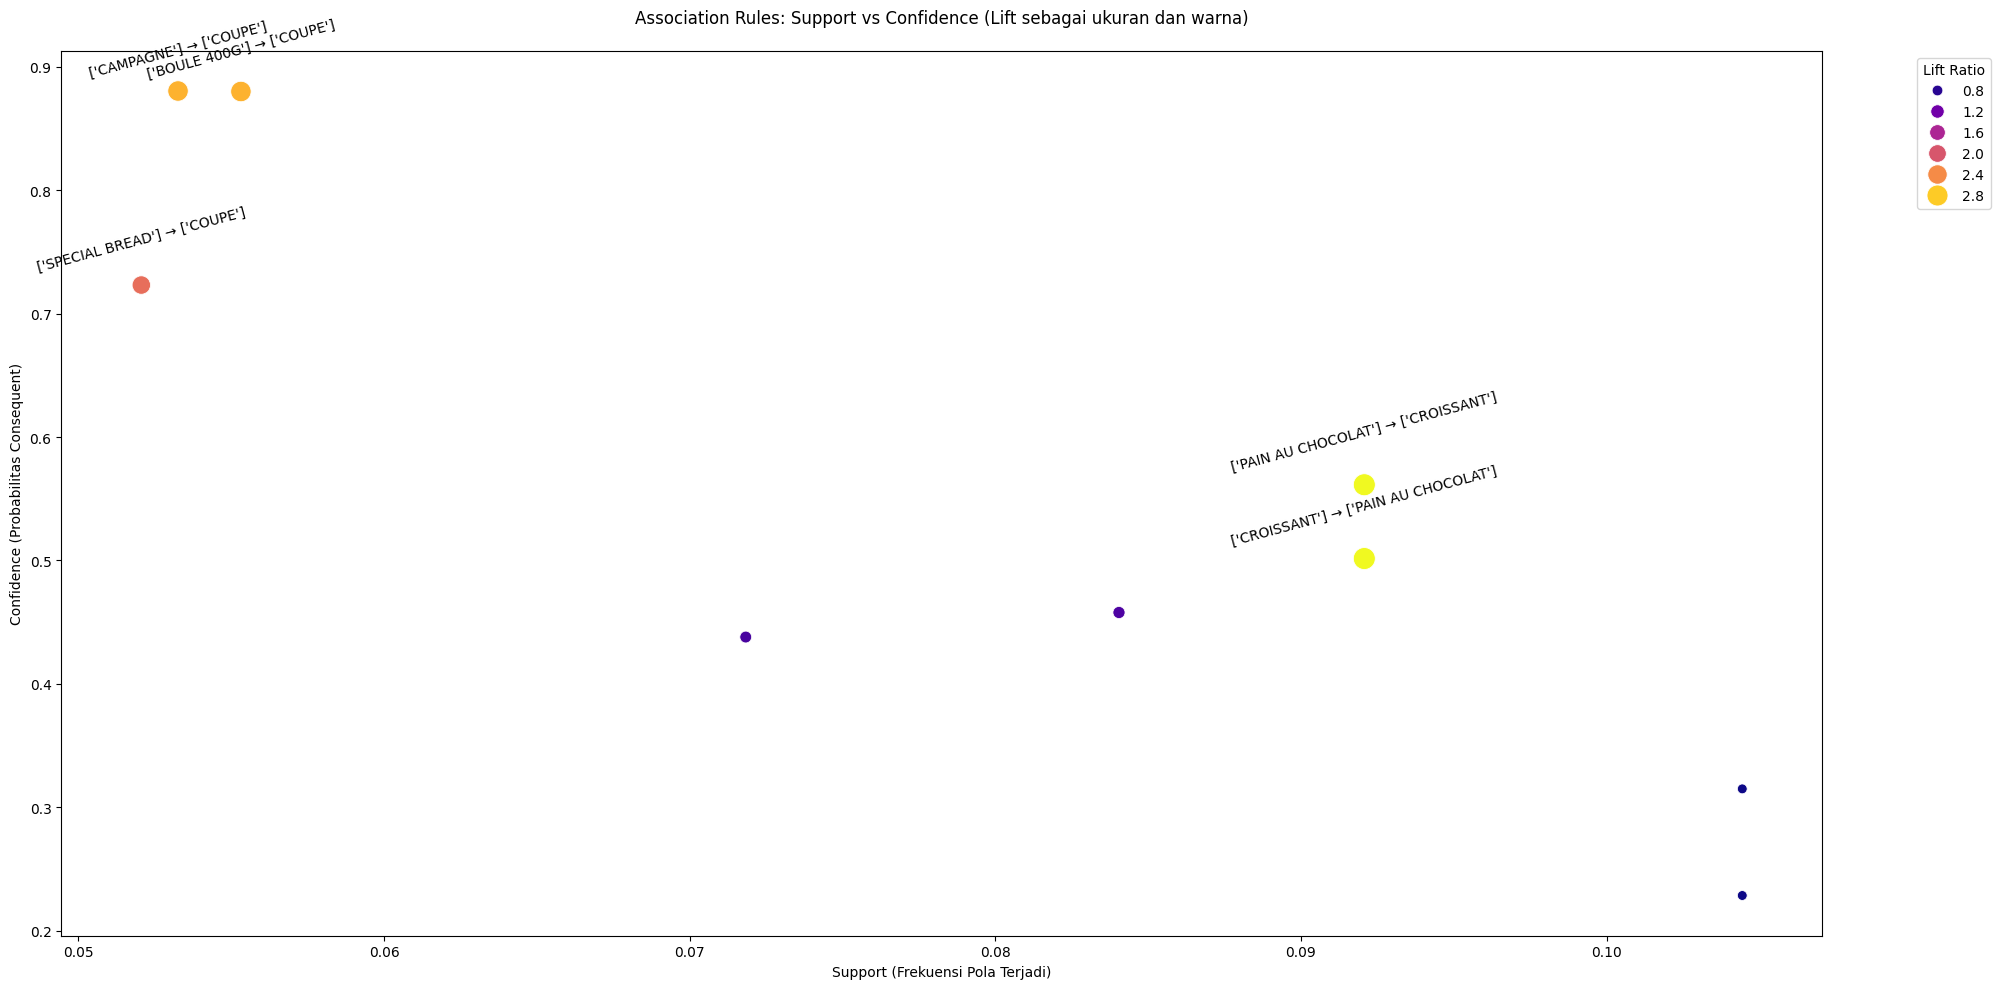

In [ ]:
# Visualisasi
plt.figure(figsize=(20, 10))
scatter = sns.scatterplot(data=rules, 
                         x='support', 
                         y='confidence',
                         size='lift',
                         hue='lift',
                         palette='plasma',
                         sizes=(50, 250))

plt.title('Association Rules: Support vs Confidence (Lift sebagai ukuran dan warna)', pad=20)
plt.xlabel('Support (Frekuensi Pola Terjadi)')
plt.ylabel('Confidence (Probabilitas Consequent)')
plt.legend(title='Lift Ratio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tambahkan label untuk top rules
for i, rule in top_10_rules.head(5).iterrows():
    plt.annotate(f"{list(rule['antecedents'])} → {list(rule['consequents'])}", 
                (rule['support'], rule['confidence']),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',rotation=15)

plt.tight_layout()
plt.show()

In [15]:
# Interpretasi mendalam untuk top rule
best_rule = top_10_rules.iloc[0]
print("\nInterpretasi Rule Terbaik:")
print(f"Aturan: Jika membeli {list(best_rule['antecedents'])}, maka akan membeli {list(best_rule['consequents'])}")
print(f"- Lift {best_rule['lift']:.1f}x: {best_rule['lift']:.1f} kali lebih mungkin dibanding pembelian acak")
print(f"- Confidence {best_rule['confidence']:.1%}: {best_rule['confidence']:.0%} kemungkinan consequent dibeli jika antecedent dibeli")
print(f"- Support {best_rule['support']:.3f}: Pola ini muncul di {best_rule['n_transactions']:.0f} transaksi")
print(f"- Total transaksi: {len(basket_encoded)}")


Interpretasi Rule Terbaik:
Aturan: Jika membeli ['CAMPAGNE'], maka akan membeli ['COUPE']
- Lift 2.7x: 2.7 kali lebih mungkin dibanding pembelian acak
- Confidence 88.0%: 88% kemungkinan consequent dibeli jika antecedent dibeli
- Support 0.053: Pola ini muncul di 3105 transaksi
- Total transaksi: 58300
